# Tensorflow 2.x SavedModel load in Tensorflow 1.x

In [1]:
import tensorflow as tf
import numpy as np
import PIL.Image as Image
from visualization_utils import draw_bounding_box_on_image
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tf.__version__

'1.15.5'

## Load Model

In [3]:
SAVED_MODEL_DIR='faster_rcnn_resnet50_v2/saved_model'
IMAGE_DIR = 'coco1.jpeg'

In [4]:
imported_model_v2 = tf.saved_model.load_v2(SAVED_MODEL_DIR)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


## Load Image as tensor

In [5]:
img = tf.io.read_file(IMAGE_DIR)
img = tf.image.decode_jpeg(img, channels=3)
img = tf.expand_dims(img, axis=0, name='input_tensor')

## Inference

In [6]:
f = imported_model_v2.signatures["serving_default"]
y = f(img)

In [7]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    y_solved = sess.run(y)

## Inference Results

In [8]:
print(type(y_solved))

<class 'dict'>


In [9]:
print(y_solved.keys())

dict_keys(['detection_anchor_indices', 'num_detections', 'detection_multiclass_scores', 'detection_boxes', 'detection_scores', 'raw_detection_boxes', 'detection_classes', 'raw_detection_scores'])


In [10]:
print(len(y_solved['detection_scores'][0]))
print(len(y_solved['detection_boxes'][0]))

100
100


In [11]:
print(y_solved)

{'detection_anchor_indices': array([[  0., 180., 123., 161., 202.,  64., 125.,  42., 172., 294.,  43.,
        167., 277.,  86.,  83., 263., 121.,  63., 169., 274., 288., 204.,
         97., 218., 137.,  52., 124.,  68.,  80., 265., 100., 252., 125.,
         85., 277., 157., 281., 169., 250.,  67., 277., 206., 287.,  86.,
        205., 122., 294., 169., 292.,  56., 292.,  12., 227., 264., 161.,
         79., 119., 169.,  85.,  23., 145., 233.,  40.,  93.,  69.,  62.,
        249.,  85., 204., 167.,  43., 110.,  52., 204., 139., 137., 227.,
        197.,  97.,  96., 163.,  58., 173., 185., 169., 163., 109., 285.,
        285.,  88., 254.,  83., 162., 121., 281., 220., 268., 131., 147.,
         38.]], dtype=float32), 'num_detections': array([100.], dtype=float32), 'detection_multiclass_scores': array([[[3.01816990e-03, 9.96354818e-01, 9.47653234e-07, ...,
         1.12289872e-05, 4.33746465e-07, 6.34053379e-07],
        [2.24163622e-01, 6.75204617e-04, 1.07547685e-05, ...,
         1.3

## Draw best box
Class 1 = Person

In [12]:
print('Drawing detection with best score')
print('Class: {}'.format(y_solved['detection_classes'][0][0]))
box = y_solved['detection_boxes'][0][0]
xmin = box[1]
ymin = box[0]
xmax = box[3]
ymax = box[2]

Drawing detection with best score
Class: 1.0


In [13]:
image = Image.open(IMAGE_DIR)
draw_bounding_box_on_image(image,
                               ymin,
                               xmin,
                               ymax,
                               xmax)

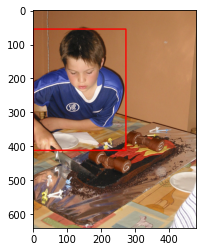

In [14]:
plt.imshow(image)